In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import hsv2rgb

from keras.models import Sequential
from keras.layers import Dense
from keras import initializers

Using TensorFlow backend.


In [2]:
x_dim = 480
y_dim = 270
scale = 4.0
z_dim = 16

In [3]:
my_init = initializers.RandomNormal(stddev=1.2)

In [4]:
model = Sequential([
    Dense(32, input_dim=3+z_dim, kernel_initializer=my_init, activation='tanh'),
    Dense(32, kernel_initializer=my_init, activation='tanh'),
    Dense(32, kernel_initializer=my_init, activation='tanh'),
    Dense(3, activation='linear')
])
model.compile(optimizer='adam', loss='mse')

In [5]:
def create_grid(x_dim=32, y_dim=32, scale=1.0):
    n_points = x_dim * y_dim
    x_range = scale*(np.arange(x_dim)-(x_dim-1)/2.0)/(x_dim-1)/0.5
    y_range = scale*(np.arange(y_dim)-(y_dim-1)/2.0)/(y_dim-1)/0.5
    x_mat = np.matmul(np.ones((y_dim, 1)), x_range.reshape((1, x_dim)))
    y_mat = np.matmul(y_range.reshape((y_dim, 1)), np.ones((1, x_dim)))
    r_mat = np.sqrt(x_mat*x_mat + y_mat*y_mat)
    x_mat = x_mat.flatten().reshape((n_points, 1))
    y_mat = y_mat.flatten().reshape((n_points, 1))
    r_mat = r_mat.flatten().reshape((n_points, 1))
    return x_mat, y_mat, r_mat

In [6]:
def generate():
    time_s = time.time()
    x_vec, y_vec, r_vec = create_grid(x_dim, y_dim, scale)
    z_vec = np.random.uniform(-1.0, 1.0, size=(z_dim,)).astype(np.float32)
    z_vec = np.tile(z_vec, x_vec.shape[0]).reshape((-1, z_dim))
    X = np.concatenate([x_vec, y_vec, r_vec, z_vec], axis=-1)
    pred = model.predict(X)
    img = pred.reshape(y_dim, x_dim, 3)
    img = (img - img.min())/(img.max() - img.min())
    #img = hsv2rgb(img)
    img = (img*255).astype(np.uint8)
    img = Image.fromarray(img)
    plt.imshow(img)
    print('generated in {0:.0f} seconds'.format(time.time() - time_s))

generated in 7 seconds


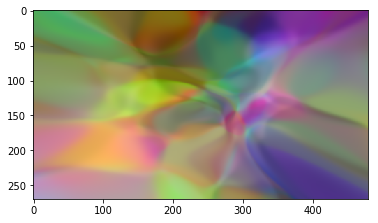

generated in 5 seconds


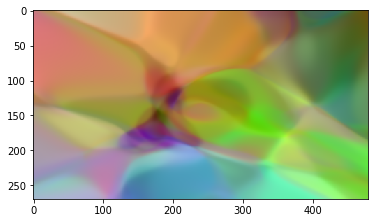

generated in 5 seconds


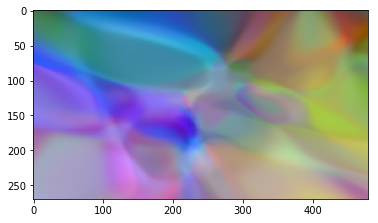

generated in 5 seconds


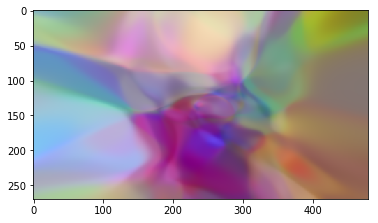

generated in 5 seconds


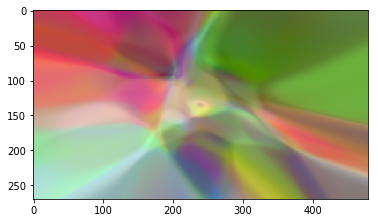

In [7]:
for _ in range(5):
    generate()
    plt.show()